In [1]:
!which python
!which pip

/opt/OpenCOR/bin/../Python/bin/python
/opt/OpenCOR/bin/../Python/bin/pip


In [1]:
import sys
print(sys.version)

3.12.2 (main, Apr  4 2024, 07:58:50) [GCC 9.4.0]


# OpenCOR 0.8.3 Tutorial

Welcome to this comprehensive tutorial on using **OpenCOR** for computational biology simulations. OpenCOR is an open-source, cross-platform modelling environment for working with **CellML** models - mathematical descriptions of biological systems.

## Learning Objectives

By the end of this tutorial, you will be able to:

1. Verify your OpenCOR Python environment is correctly configured
2. Understand the basics of CellML and the OpenCOR simulation framework
3. Load and inspect CellML models from local files and online repositories
4. Configure and run simulations with different solvers
5. Extract simulation results and create publication-quality visualizations

---

## Section 1: Environment Setup & Verification

Before we begin, it's **critical** to verify that you're using the correct Python interpreter. This tutorial runs inside a Docker container with OpenCOR installed at `/opt/OpenCOR`.

> ⚠️ **Important:** You must use OpenCOR's bundled Python (`/opt/OpenCOR/run_python`), NOT the system Python (`python3`). The `opencor` module is only available in OpenCOR's Python environment.

Let's verify our environment:

In [16]:
# Environment Verification
import sys

print("=" * 60)
print("ENVIRONMENT VERIFICATION")
print("=" * 60)
print(f"\nPython executable: {sys.executable}")
print(f"Python version: {sys.version}")

# Check if OpenCOR module is available (best indicator of correct environment)
try:
    import opencor
    print("\n✅ SUCCESS: OpenCOR environment detected")
    print(f"   OpenCOR module loaded from: {opencor.__file__}")
except ImportError:
    print("\n❌ WARNING: OpenCOR module not available!")
    print("   Make sure you are using the OpenCOR kernel.")
    print("   Go to Kernel > Change Kernel > OpenCOR")

ENVIRONMENT VERIFICATION

Python executable: 
Python version: 3.12.2 (main, Apr  4 2024, 07:58:50) [GCC 9.4.0]

✅ SUCCESS: OpenCOR environment detected
   OpenCOR module loaded from: OpenCOR


In [2]:
# Import OpenCOR module
try:
    import opencor as oc
    print("✅ OpenCOR module imported successfully")
    print(f"   Module location: {oc.__file__}")
except ImportError as e:
    print(f"❌ Failed to import OpenCOR: {e}")
    print("   Make sure you're using /opt/OpenCOR/run_jupyter")

✅ OpenCOR module imported successfully
   Module location: OpenCOR


In [3]:
# Import other required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Configure matplotlib for headless environment
%matplotlib inline
plt.style.use('seaborn-v0_8-whitegrid')

print("✅ All libraries imported successfully")
print(f"   NumPy version: {np.__version__}")
print(f"   Pandas version: {pd.__version__}")

✅ All libraries imported successfully
   NumPy version: 1.26.4
   Pandas version: 3.0.0


/opt/OpenCOR/Python/lib/python3.12/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/opt/OpenCOR/Python/lib/python3.12/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


---

## Section 2: Introduction to CellML and OpenCOR

### What is CellML?

**CellML** (Cell Markup Language) is an XML-based language for describing mathematical models of biological systems. It was developed to:

- **Standardize** the representation of biological models
- **Enable sharing** and reuse of models between researchers
- **Ensure reproducibility** of computational experiments

CellML models typically describe systems of **ordinary differential equations (ODEs)** that represent:
- Ion channel dynamics in neurons
- Cardiac cell electrophysiology
- Metabolic pathways
- Signal transduction networks

### What is OpenCOR?

**OpenCOR** is a modelling environment for:
- **Editing** CellML models
- **Simulating** models using various ODE/DAE solvers
- **Analyzing** simulation results

### The OpenCOR Python API

OpenCOR provides a Python scripting interface with the following key objects:

| Object | Description |
|--------|-------------|
| `Simulation` | Main simulation object returned by `opencor.open_simulation()` |
| `SimulationData` | Access to model parameters via `simulation.data()` |
| `SimulationResults` | Access to output data via `simulation.results()` |

### Key API Methods

```python
# Open a simulation
simulation = oc.open_simulation("path/to/model.cellml")

# Configure simulation parameters
data = simulation.data()
data.set_starting_point(0)
data.set_ending_point(100)
data.set_point_interval(0.1)

# Run the simulation
simulation.run()

# Access results
results = simulation.results()
```

---

## Section 3: Loading and Inspecting CellML Models

OpenCOR can load CellML models from:
1. **Local files** on your filesystem
2. **Remote URLs** from the Physiome Model Repository (PMR)

Let's start by loading a simple first-order ODE model that describes exponential decay:

$$\frac{dy}{dt} = -ay + b$$

This is the simplest type of ODE model, useful for understanding radioactive decay, drug elimination, or any first-order kinetic process.

In [4]:
# Load a model from the Physiome Model Repository
# This is a simple first-order ODE model

model_url = "https://models.physiomeproject.org/workspace/25d/rawfile/60ac9389285471a704f2f4be6e1a8ba5cbf45d1a/Firstorder.cellml"

print("Loading model from Physiome Model Repository...")
simulation = oc.open_simulation(model_url)

if simulation:
    print("✅ Model loaded successfully!")
else:
    print("❌ Failed to load model")

Loading model from Physiome Model Repository...
✅ Model loaded successfully!


### Inspecting Model Structure

Once a model is loaded, we can inspect its structure using the `simulation.data()` object. This gives us access to:

- **Constants**: Fixed parameters that don't change during simulation
- **States**: Variables that change over time (the dependent variables)
- **Rates**: The derivatives of state variables
- **Algebraic**: Variables computed from other variables

In [5]:
# Get the simulation data object
data = simulation.data()

print("=" * 60)
print("MODEL INSPECTION")
print("=" * 60)

# Explore constants (parameters)
print("\n📋 CONSTANTS (Model Parameters):")
print("-" * 40)
constants = data.constants()
for name, var in constants.items():
    print(f"   {name}: {var.value()}")

# Explore state variables
print("\n📊 STATES (Dependent Variables):")
print("-" * 40)
states = data.states()
for name, var in states.items():
    print(f"   {name}: initial = {var.value()}")

# Explore algebraic variables
print("\n🔢 ALGEBRAIC (Computed Variables):")
print("-" * 40)
algebraic = data.algebraic()
if algebraic:
    for name, var in algebraic.items():
        print(f"   {name}: {var.value()}")
else:
    print("   (No algebraic variables in this model)")

MODEL INSPECTION

📋 CONSTANTS (Model Parameters):
----------------------------------------
   main/a: 1.0
   main/b: 2.0

📊 STATES (Dependent Variables):
----------------------------------------
   main/y: initial = 5.0

🔢 ALGEBRAIC (Computed Variables):
----------------------------------------
   (No algebraic variables in this model)


In [6]:
# View simulation time settings
print("\n⏱️ SIMULATION TIME SETTINGS:")
print("-" * 40)
print(f"   Starting point: {data.starting_point()}")
print(f"   Ending point: {data.ending_point()}")
print(f"   Point interval: {data.point_interval()}")


⏱️ SIMULATION TIME SETTINGS:
----------------------------------------
   Starting point: 0.0
   Ending point: 1000.0
   Point interval: 1.0


---

## Section 4: Running Simulations

Now that we understand the model structure, let's configure and run a simulation.

### Simulation Configuration

Before running a simulation, we need to specify:
1. **Starting point**: When the simulation begins (usually 0)
2. **Ending point**: When the simulation stops
3. **Point interval**: How often to record data points

### Available Solvers

OpenCOR provides several ODE solvers:

| Solver | Type | Description |
|--------|------|-------------|
| CVODE | Adaptive | Variable-step, high accuracy (recommended) |
| Forward Euler | Fixed-step | Simple but less accurate |
| Heun | Fixed-step | Improved Euler method |
| Runge-Kutta (2nd order) | Fixed-step | Classic method |
| Runge-Kutta (4th order) | Fixed-step | Higher accuracy |

For most applications, **CVODE** is recommended as it automatically adjusts step size for accuracy.

In [7]:
# Reset the simulation to clear any previous runs
simulation.reset()

# Configure simulation parameters
data = simulation.data()

# Set time parameters
data.set_starting_point(0)     # Start at t=0
data.set_ending_point(10)      # End at t=10
data.set_point_interval(0.01)  # Record every 0.01 time units

print("Simulation configured:")
print(f"   Time range: {data.starting_point()} to {data.ending_point()}")
print(f"   Point interval: {data.point_interval()}")
print(f"   Expected data points: {int((data.ending_point() - data.starting_point()) / data.point_interval()) + 1}")

Simulation configured:
   Time range: 0.0 to 10.0
   Point interval: 0.01
   Expected data points: 1001


In [8]:
# Run the simulation
print("Running simulation...")
simulation.run()
print("✅ Simulation complete!")

Running simulation...
✅ Simulation complete!


### Modifying Model Parameters

We can change model constants before running a simulation to explore different scenarios:

In [9]:
# Reset and modify parameters
simulation.reset()

# Get data object
data = simulation.data()

# Modify initial condition for state variable 'y'
# (Accessing by the full path: component/variable)
states = data.states()
print("State variables available:")
for name in states.keys():
    print(f"   - {name}")

# Modify constants if needed
constants = data.constants()
print("\nConstants available:")
for name in constants.keys():
    print(f"   - {name}")

State variables available:
   - main/y

Constants available:
   - main/a
   - main/b


---

## Section 5: Accessing and Visualizing Results

After running a simulation, we can access the results and create visualizations.

### Accessing Results

The `simulation.results()` object provides access to all computed values:

In [10]:
# First, run a fresh simulation
simulation.reset()
data = simulation.data()
data.set_starting_point(0)
data.set_ending_point(10)
data.set_point_interval(0.01)
simulation.run()

# Access results
results = simulation.results()

print("=" * 60)
print("SIMULATION RESULTS")
print("=" * 60)

# Get the variable of integration (time)
voi = results.voi()  # Variable of integration
time = voi.values()
print(f"\n⏱️ Time points: {len(time)} samples")
print(f"   Range: {time[0]:.2f} to {time[-1]:.2f}")

# Get state variable results
print("\n📊 State Results:")
print("-" * 40)
states_results = results.states()
for name, var in states_results.items():
    values = var.values()
    print(f"   {name}:")
    print(f"      Initial: {values[0]:.4f}")
    print(f"      Final: {values[-1]:.4f}")

SIMULATION RESULTS

⏱️ Time points: 1001 samples
   Range: 0.00 to 10.00

📊 State Results:
----------------------------------------
   main/y:
      Initial: 5.0000
      Final: 2.0001


### Creating Visualizations

Now let's create publication-quality plots of our simulation results:

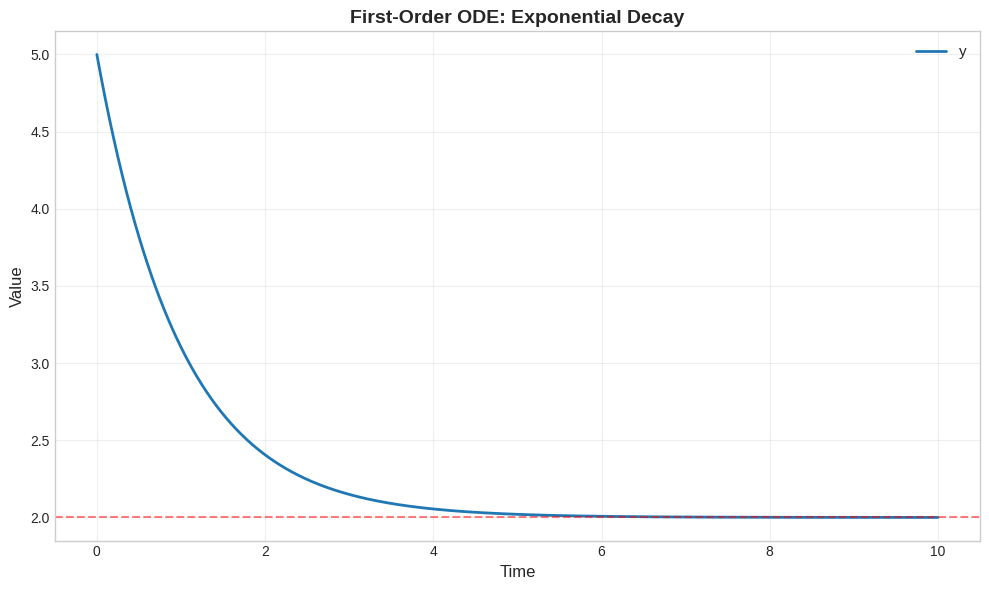


📈 Plot shows the solution of dy/dt = -ay + b
   The system approaches steady state y∞ = b/a


In [11]:
# Extract data for plotting
time = results.voi().values()

# Get the state variable 'y' (first order decay)
states_results = results.states()

# Create a figure
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each state variable
for name, var in states_results.items():
    values = var.values()
    ax.plot(time, values, linewidth=2, label=name.split('/')[-1])  # Use variable name only

# Customize the plot
ax.set_xlabel('Time', fontsize=12)
ax.set_ylabel('Value', fontsize=12)
ax.set_title('First-Order ODE: Exponential Decay', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)

# Add annotations
y_values = list(states_results.values())[0].values()
ax.axhline(y=y_values[-1], color='red', linestyle='--', alpha=0.5, label='Steady state')

plt.tight_layout()
plt.show()

print(f"\n📈 Plot shows the solution of dy/dt = -ay + b")
print(f"   The system approaches steady state y∞ = b/a")

### Converting Results to Pandas DataFrame

For more advanced analysis, we can convert simulation results to a pandas DataFrame:

In [12]:
# Create a DataFrame from simulation results
df_data = {'time': results.voi().values()}

# Add state variables
for name, var in results.states().items():
    col_name = name.split('/')[-1]  # Use just the variable name
    df_data[col_name] = var.values()

# Add constants info (these don't change over time)
df = pd.DataFrame(df_data)

print("Simulation Results as DataFrame:")
print("=" * 60)
print(df.head(10))
print("...")
print(df.tail(5))
print(f"\nShape: {df.shape[0]} rows × {df.shape[1]} columns")

Simulation Results as DataFrame:
   time         y
0  0.00  5.000000
1  0.01  4.970150
2  0.02  4.940596
3  0.03  4.911336
4  0.04  4.882367
5  0.05  4.853686
6  0.06  4.825291
7  0.07  4.797179
8  0.08  4.769347
9  0.09  4.741791
...
       time         y
996    9.96  2.000142
997    9.97  2.000141
998    9.98  2.000139
999    9.99  2.000138
1000  10.00  2.000136

Shape: 1001 rows × 2 columns


In [13]:
# Statistical summary
print("\nStatistical Summary:")
print("=" * 60)
print(df.describe())


Statistical Summary:
              time            y
count  1001.000000  1001.000000
mean      5.000000     2.301188
std       2.891081     0.603083
min       0.000000     2.000136
25%       2.500000     2.001660
50%       5.000000     2.020215
75%       7.500000     2.246256
max      10.000000     5.000000


### Multiple Simulations with Different Parameters

Let's demonstrate running multiple simulations with different initial conditions:

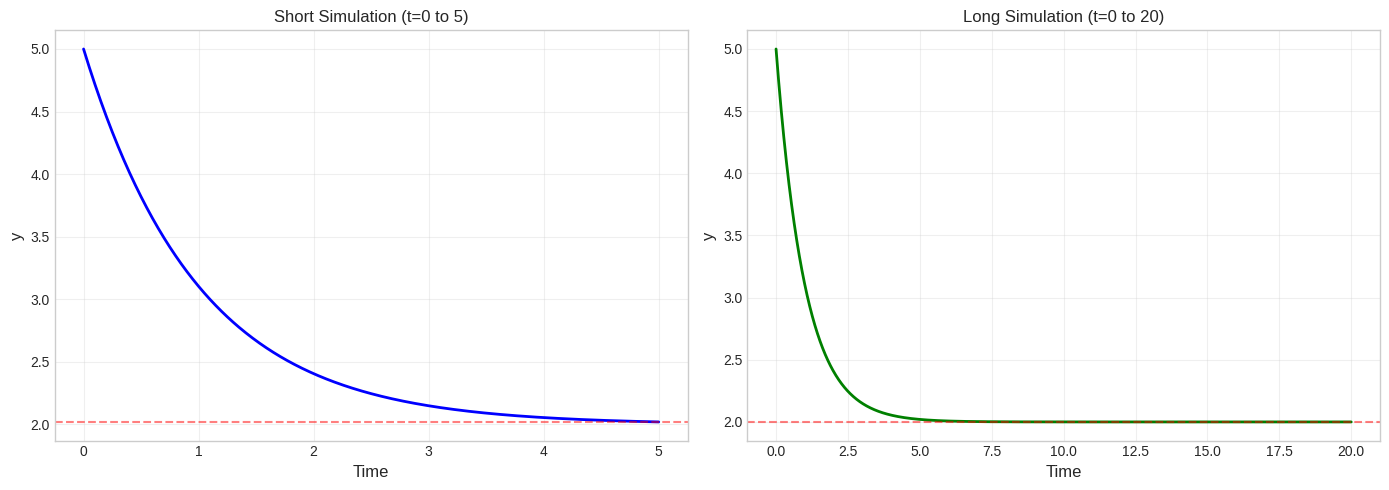

Short simulation final value: 2.0202
Long simulation final value: 2.0000
Steady state (b/a = 2/1): 2.0000


In [14]:
# Run simulations with different time endpoints
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Simulation 1: Short time
simulation.reset()
data = simulation.data()
data.set_starting_point(0)
data.set_ending_point(5)
data.set_point_interval(0.01)
simulation.run()

results1 = simulation.results()
time1 = results1.voi().values()
y1 = list(results1.states().values())[0].values()

axes[0].plot(time1, y1, 'b-', linewidth=2)
axes[0].set_xlabel('Time', fontsize=12)
axes[0].set_ylabel('y', fontsize=12)
axes[0].set_title('Short Simulation (t=0 to 5)', fontsize=12)
axes[0].grid(True, alpha=0.3)
axes[0].axhline(y=y1[-1], color='red', linestyle='--', alpha=0.5)

# Simulation 2: Long time
simulation.reset()
data = simulation.data()
data.set_starting_point(0)
data.set_ending_point(20)
data.set_point_interval(0.01)
simulation.run()

results2 = simulation.results()
time2 = results2.voi().values()
y2 = list(results2.states().values())[0].values()

axes[1].plot(time2, y2, 'g-', linewidth=2)
axes[1].set_xlabel('Time', fontsize=12)
axes[1].set_ylabel('y', fontsize=12)
axes[1].set_title('Long Simulation (t=0 to 20)', fontsize=12)
axes[1].grid(True, alpha=0.3)
axes[1].axhline(y=y2[-1], color='red', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

print(f"Short simulation final value: {y1[-1]:.4f}")
print(f"Long simulation final value: {y2[-1]:.4f}")
print(f"Steady state (b/a = 2/1): 2.0000")

---

## Summary

In this tutorial, you learned how to:

1. ✅ **Verify your environment** - Ensuring you're using OpenCOR's bundled Python
2. ✅ **Understand CellML and OpenCOR** - The framework for biological modeling
3. ✅ **Load models** - From local files or the Physiome Model Repository
4. ✅ **Inspect model structure** - Viewing constants, states, and algebraic variables
5. ✅ **Configure and run simulations** - Setting time parameters and executing
6. ✅ **Visualize results** - Creating plots with matplotlib
7. ✅ **Convert to DataFrames** - Using pandas for analysis

### Key API Reference

```python
# Core workflow
import opencor as oc

simulation = oc.open_simulation("model.cellml")  # Load model
data = simulation.data()                         # Get configuration
data.set_ending_point(100)                        # Configure time
simulation.run()                                 # Execute
results = simulation.results()                   # Get output
time = results.voi().values()                   # Time array
states = results.states()                       # State variables
```

### Next Steps

- Explore more complex models from the [Physiome Model Repository](https://models.physiomeproject.org/)
- Try the Hodgkin-Huxley model for neural dynamics
- Experiment with different ODE solvers
- Learn about SED-ML for reproducible simulation experiments

In [15]:
# Clean up
oc.close_simulation(simulation)
print("Tutorial complete! Simulation closed.")

Tutorial complete! Simulation closed.
